

# Project: Investigate a Dataset - [Database_No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

 - This [dataset](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv) consists of information of about 100k medical appointments in Brazil. The main focus of the dataset is whether the patients showed up for their appointments or not. The dataset consists of 14 columns:
--------------------------------
|Column  | 	Description
|:------------- | :-------------
|PatientId | Identification of a patient
|AppointmentID  | Identification of each appointment
|Gender | Male or Female.
|ScheduledDay | what day the patient set up their appointment.
|AppointmentDay | The day of the actuall appointment, when they have to visit the doctor.
|Age	 | How old is the patient.
|Neighbourhood | indicates the location of the hospital.
|Scholarship	 | Medical Scholarship (True of False)
|Hipertension | True of False
|Diabetes | True of False
|Alcoholism | True of False
|Handcap | True of False
|SMS_received | messages sent to the patient.
|No-show | Patients who attended or missed their appointment (Yes = Missed; No = Attended) 


### Question(s) for Analysis
- How Gender of the patient affects his/her show-up?
- How the age of the patients affects the show-up?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# loads tabular Data
import pandas as pd

# NumPy is very useful for performing mathematical and logical operations on Arrays
import numpy as np

# creats charts
import matplotlib.pyplot as plt
%matplotlib inline


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

csv_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(csv_url)
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# print last five rows in dataset to review data and format
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
df.shape

(110527, 14)

- The dataset has **110527** row and **14** coulmn

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# this returns the number of unique values in each column

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> The dataset has key column is **AppointmentID**
<br>**Incorrect values in handicap column since it only contains 0 or 1**

In [9]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [10]:
#   types and look for instances of missing or possibly errant data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [11]:
# Count all NaN in a DataFrame (both columns & Rows)

print(df.isnull().sum().sum())

0


> The dataset not has **NAN values** and **duplicate rows**

In [12]:
# Check if there is rows with the same only patient id and appointment id

print(df.duplicated(["PatientId","AppointmentID"]).sum())

0


In [13]:
print('patient id duplicates:',df.PatientId.duplicated().sum())
print('appointment id duplicates:',df.AppointmentID.duplicated().sum())

patient id duplicates: 48228
appointment id duplicates: 0


>- **Looks like AppointmentID has no duplicates so we can use it as an index.**
>- **PatientID duplicating make sense , it means that the same patient had several appointments.**

In [14]:
print('Number of Patients with unique ID:',len(df.PatientId.unique()))
print('Number of Appointments:',df.PatientId.value_counts().sum())

Number of Patients with unique ID: 62299
Number of Appointments: 110527


#### Initial Data Summary


- The average age of the Patient is around 37 yrs and min is -1.
- The data columns (ScheduledDay, AppointmentDay) needed to be converted to datetime data type
- There were no missing values in the dataset.
- The Age column has one value that was equal to -1 and we dropped the row that contained it.
- The Handcap column has more than two values and with some research, we found that it refers to the number of disabilities a person has and needed to be converted 2,3,4 to 1.
- The dataset has no duplicates rows.
- change a column of yes/no to 1/0 in no-show.


### Data Cleaning



In [15]:
# replacing wrong values in handicap column

df['Handcap'].replace(2 ,1 ,inplace=True)
df['Handcap'].replace(3 ,1 ,inplace=True)
df['Handcap'].replace(4 ,1 ,inplace=True)


In [16]:
# this returns the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> **The dataset has two columns with incorrect types**

- ScheduledDay
- AppointmentDay So, we wil convert them to datetime types

In [17]:
# Convert ScheduledDay and AppointmentDay to datetime type

df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [18]:
df['No-show'] = df['No-show'].map(
                   {'Yes':1 ,'No':0})
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0


In [19]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.020276,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.140942,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> **Age column has some values incorrect because the min value is -1**

In [20]:
# investigating Age :

print(df.Age.value_counts())

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64


> There is just **1** value = -1 : We will drop it.

In [21]:
df.drop(df.query("Age == -1").index,inplace=True)

In [22]:
# Check Age

print(df.Age.describe())

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (How Gender of the patient affects his/her show-up?)

In [23]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,1.000000,0.004023,-0.004121,-0.002877,-0.006436,0.001608,0.011014,-0.008657,-0.009742,-0.001456
AppointmentID,0.004023,1.000000,-0.019106,0.022619,0.012759,0.022632,0.032946,0.015128,-0.256613,-0.162597
Age,-0.004121,-0.019106,1.000000,-0.092463,0.504586,0.292391,0.095810,0.083742,0.012633,-0.060327
Scholarship,-0.002877,0.022619,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.009104,0.001192,0.029134
Hipertension,-0.006436,0.012759,0.504586,-0.019730,1.000000,0.433085,0.087970,0.084851,-0.006270,-0.035704
Diabetes,0.001608,0.022632,0.292391,-0.024894,0.433085,1.000000,0.018473,0.059144,-0.014552,-0.015181
Alcoholism,0.011014,0.032946,0.095810,0.035022,0.087970,0.018473,1.000000,0.003692,-0.026149,-0.000197
Handcap,-0.008657,0.015128,0.083742,-0.009104,0.084851,0.059144,0.003692,1.000000,-0.025221,-0.007281
SMS_received,-0.009742,-0.256613,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.025221,1.000000,0.126428
No-show,-0.001456,-0.162597,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.007281,0.126428,1.000000


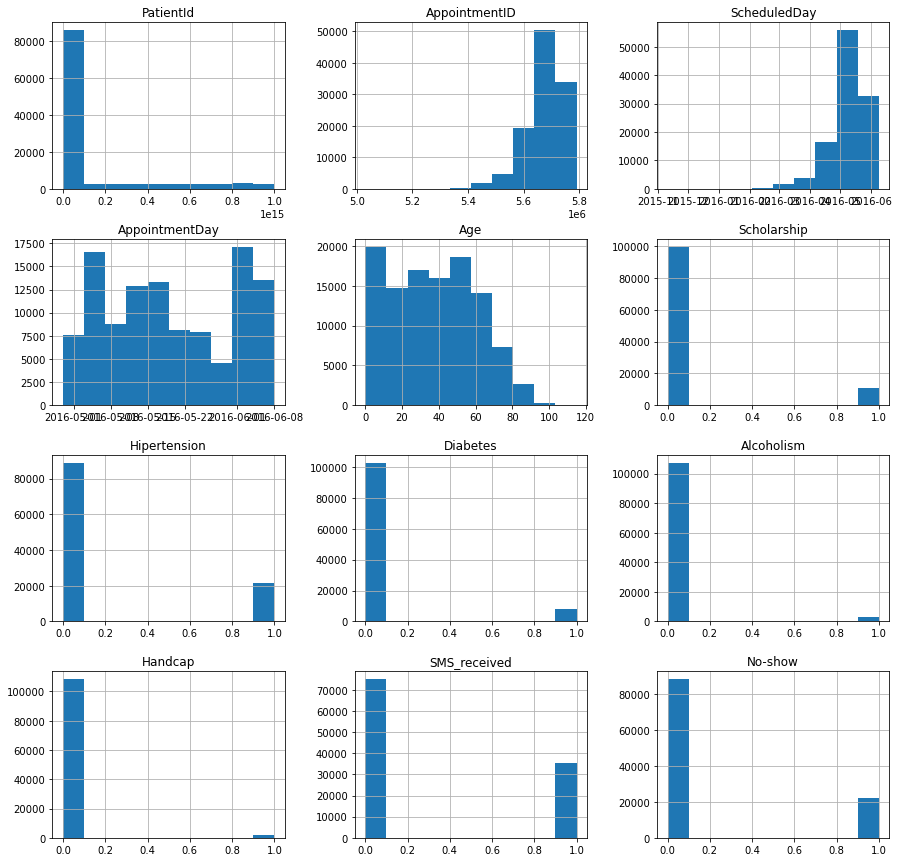

In [24]:
# hist

df.hist(figsize= (15,15));

In [25]:
df.mean()

<ipython-input-25-c61f0c8f89b5>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()


PatientId        1.474934e+14
AppointmentID    5.675304e+06
Age              3.708922e+01
Scholarship      9.826647e-02
Hipertension     1.972477e-01
Diabetes         7.186544e-02
Alcoholism       3.040009e-02
Handcap          2.027577e-02
SMS_received     3.210285e-01
No-show          2.019344e-01
dtype: float64

In [26]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,0.201934
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,0.401445
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### 1. The ratio between males and females :

In [27]:
# percentage of male and female in the dataset

print(round(df.Gender.value_counts()/len(df)*100))

F    65.0
M    35.0
Name: Gender, dtype: float64


- `percentage of male is 35%`
- `percentage of female is 65%`

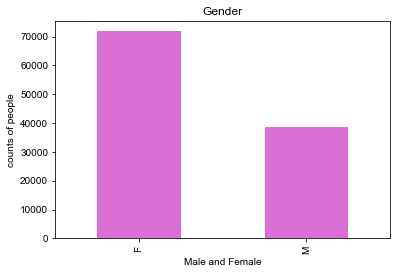

In [28]:
# bar chart for gender

df.Gender.value_counts().plot(kind="bar",color="orchid")
plt.style.use('seaborn')
plt.title("Gender")
plt.xlabel('Male and Female')
plt.ylabel('counts of people')
plt.show()

> The proportion of females is greater than that of males (the number of females is near twice the number of men)

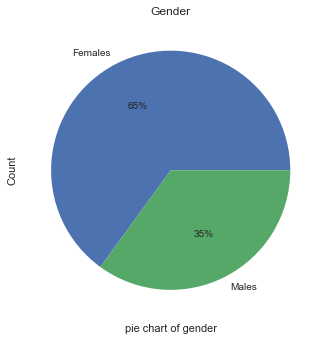

In [29]:
#  autopct='%1.0f%%'    put percentage of male and female in pie chart

df.Gender.value_counts().plot(kind="pie",labels=["Females","Males"],   autopct='%1.0f%%')
plt.ylabel("Count")
plt.xlabel("pie chart of gender")
plt.title("Gender");

> The proportion of females is 65% and The proportion of males is 35%

### Research Question 2  (How the age of the patients affects the show-up?)

In [30]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


**Age Exploration**

In [31]:
# Basic info about Age

df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

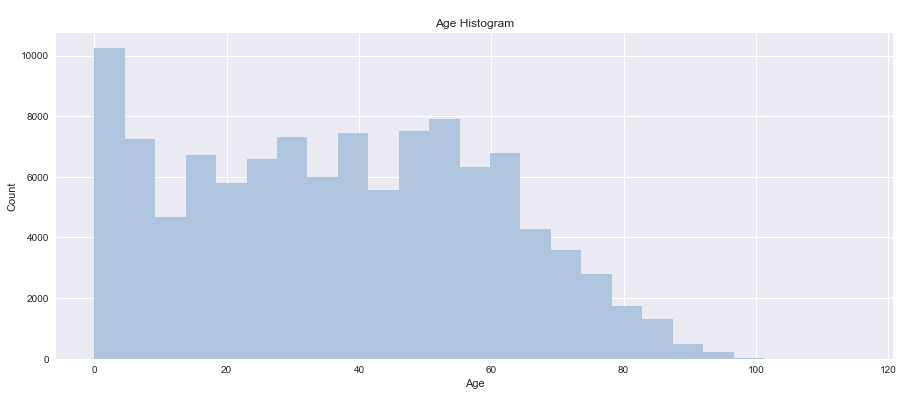

In [32]:
# Histogram plot of Age

df.Age.hist(bins=25, color = "lightsteelblue",figsize=(15,6)) 
plt.xlabel("Age") 
plt.ylabel("Count") 
plt.title("\nAge Histogram");

>- The average age of the Patient is around 37 yrs and min is 0 


### **General Exploration Results:**
- The proportion of females is greater than that of males.
- The Age range is contain nearly all ages (from 0 to 115) and the majority is in very young age and between 20 and 55.


**Exploratory Data Analysis**
- The main goal of this analysis is to find why patients miss their appointment. and this will be done by finding the relationships between the patients who missed and Attended their appointment and the other charactrestics in the dataset.

1- How Gender of the patient affects his/her show-up?
<br>2- How the age of the patients affects the show-up?

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       


### q1. How Gender of the patient affects his/her show-up?

In [36]:
Gender_count = df.groupby("Gender")["No-show"].value_counts()
print(Gender_count)

Gender  No-show
F       0          57245
        1          14594
M       0          30962
        1           7725
Name: No-show, dtype: int64


In [57]:
def MyHistplot(df, xVar, figsize = (14, 6), stacked = True, normalize = False):
    df.groupby(xVar)['No-show'].value_counts(normalize = normalize).mul(int(f'{100 if normalize else 1}')).round(2).unstack().plot(kind="bar",
                                                                                                                                 stacked=stacked, 
                                                                                                                                 figsize=figsize,
                                                                                                                                width=0.7,
                                                                                                                                edgecolor='white',
                                                                                                                                 rot= 0);
    plt.ylabel("missing appointments")
    plt.title(f"persantage of missing appointments across all{xVar}".title(),fontsize = 18, weight='bold');
    if normalize :
        plt.axhline(df['No-show'].value_counts(normalize = True).mul(100)[0],
                   color = 'maroon', ls = '-.', alpha = 0.75, label = 'proportion of Attendance\n (All patients)')
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5));

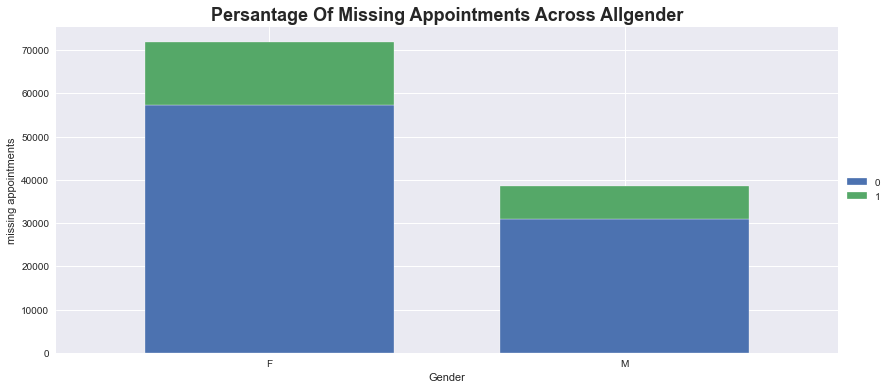

In [58]:
MyHistplot(df, 'Gender')

**Results:**
- we could say that there is no corolation between gender alone and missing the appointment.

- The percentage of male and female patients missing their appointments is the same and same as the general average.


### q2.How the age of the patients affects the show-up?

In [38]:
# making masks to use later

miss = df["No-show"] == 1
show = df["No-show"] == 0

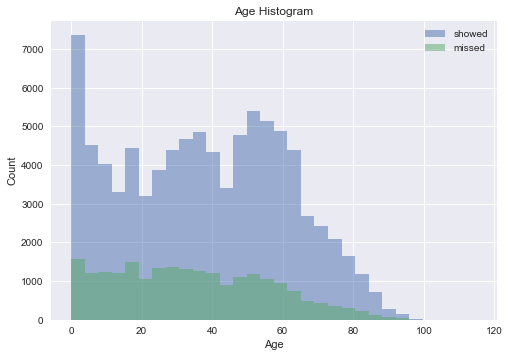

In [39]:
# histogram for ages of patients

df[show].Age.hist(alpha=0.5, bins=30,label="showed")
df[miss].Age.hist(alpha=0.5, bins=30,label="missed")
plt.legend();
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Count");

> this hist show us show and missed people by age 

In [60]:
# Stacked bar plot for the patients who missed thier appointment across all ages
#df.groupby('Age')['No-show'].value_counts(normalize = True).mul(100).round(2).unstack().plot(kind="bar",stacked=True, figsize=(30,8),
#                                                                                           width=0.7,
 #                                                                                           edgecolor='white',
  #                                                                                           rot= 0);
#plt.legend(["showed","missed"]);
#plt.ylabel("massing appointments")
#plt.title("Persantage of massing appointments across all ages");

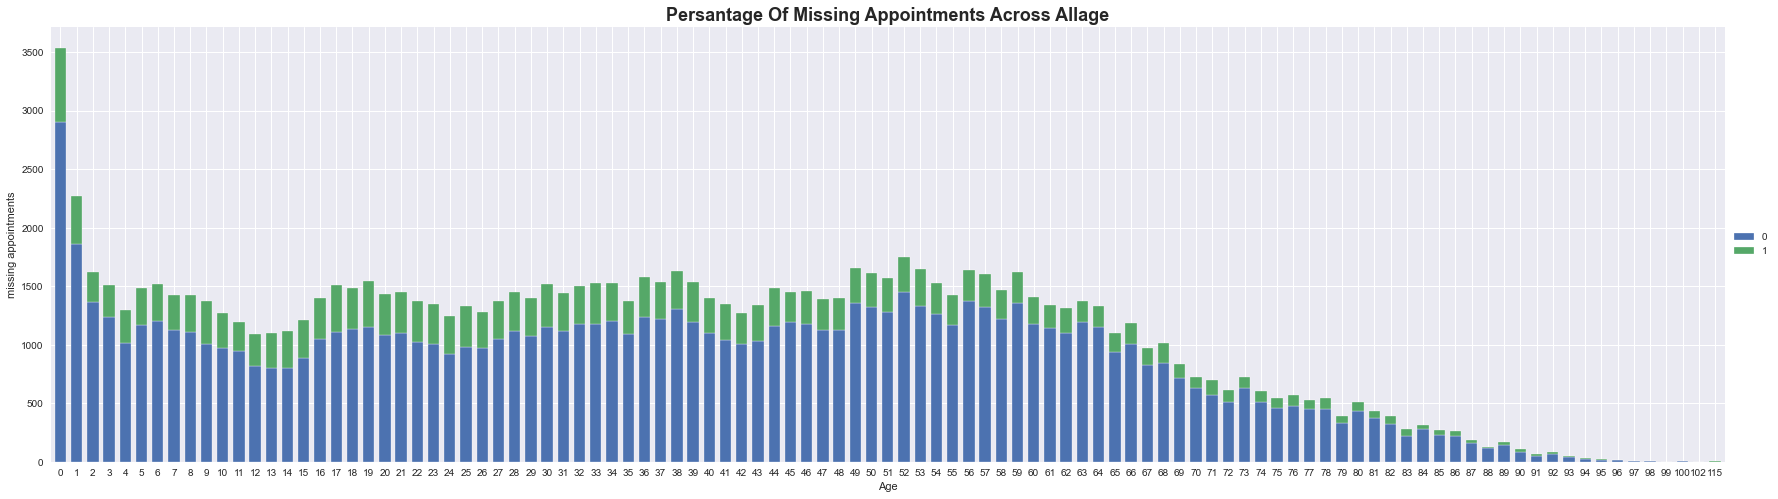

In [59]:
MyHistplot(df, 'Age', figsize = [30, 8])

> Persantage of massing appointments across all ages

**Binning Age**<br>
Dividing Age into bins with a width of 10, to get a clear look on each age group:

In [43]:
bins=[0,10,20,30,40,50,60,70,80,90,100,120]
df["Age_bin10"] = pd.cut(df.Age, bins=bins)
Age10_count = df.groupby("Age_bin10")["No-show"].value_counts()

In [44]:
Age10_count

Age_bin10   No-show
(0, 10]     0          12061
            1           3149
(10, 20]    0           9791
            1           3308
(20, 30]    0          10389
            1           3394
(30, 40]    0          11820
            1           3232
(40, 50]    0          11550
            1           2870
(50, 60]    0          12940
            1           2721
(60, 70]    0           9541
            1           1648
(70, 80]    0           4832
            1            889
(80, 90]    0           2137
            1            407
(90, 100]   0            242
            1             59
(100, 120]  0              4
            1              3
Name: No-show, dtype: int64

Text(0.5, 1.0, 'Prcentage of Missing appointment across ages')

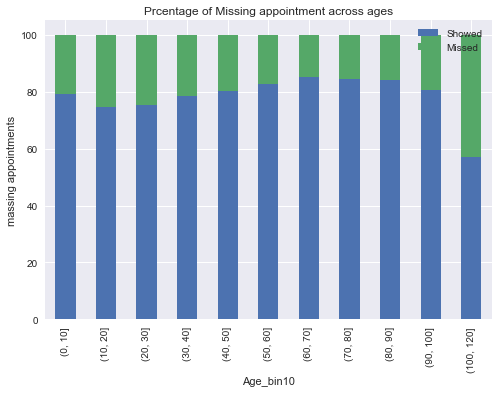

In [45]:
(Age10_count/Age10_count.groupby(level=0).sum()*100).unstack().plot(kind="bar",stacked=True)
plt.legend(["Showed","Missed"])
plt.ylabel("massing appointments")
plt.title("Prcentage of Missing appointment across ages")

In [46]:
(Age10_count/Age10_count.groupby(level=0).sum()*100)

Age_bin10   No-show
(0, 10]     0          79.296515
            1          20.703485
(10, 20]    0          74.746164
            1          25.253836
(20, 30]    0          75.375463
            1          24.624537
(30, 40]    0          78.527770
            1          21.472230
(40, 50]    0          80.097087
            1          19.902913
(50, 60]    0          82.625631
            1          17.374369
(60, 70]    0          85.271249
            1          14.728751
(70, 80]    0          84.460759
            1          15.539241
(80, 90]    0          84.001572
            1          15.998428
(90, 100]   0          80.398671
            1          19.601329
(100, 120]  0          57.142857
            1          42.857143
Name: No-show, dtype: float64

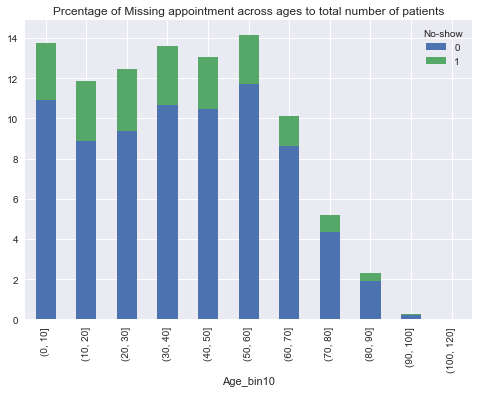

In [47]:
# ratio to all patients

(Age10_count/len(df)*100).unstack().plot(kind="bar",stacked=True);
plt.title("Prcentage of Missing appointment across ages to total number of patients");

In [48]:
(Age10_count/Age10_count.groupby(level=0).sum()*100).unstack().mean()

No-show
0    78.358522
1    21.641478
dtype: float64

**Results:**
- There is no strong corolation between age alone and missing the appointment :

- The mean of patient missing an appointment across all ages (19.85%) is close to the overall avarge (20.19%)

**After some exploration we could say:**
> patients from 12 to mid 30s are more likely to miss their appointments<br>kids and patients in their 60s, 70s and 80s are more likely to show to their appointments : The reason for that could be because there is someone who is taking them to their appointments.

<a id='conclusions'></a>
## Conclusions

> **Results**: Our data suggest that 
>>- There is not big different between the distribution of Age between patients who showed up for the appointment versus the patients that did not show up for the appointment. 
>>- There are 13 independent variables and 1 dependednt variable No-show.<br>
>>- The mean of patient missing an appointment across all ages (19.85%) is close to the overall avarge (20.19%)<br>
>>- patients from 12 to mid 30s are more likely to miss their appointments
>>- kids and patients in their 60s, 70s and 80s are more likely to show to their appointments : The reason for that could be because there is someone who is taking them to their appointments.


> **limitations**: There are a couple of limitations with our data:
>>- The statistics used here are descritive statistics, not inferential, meaning that we did not create any hypotheses or controlled experments or inferences with our data.
>>- Cannot show strong correlations between factors since most of our data is categorical.

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1